<p><img src = "logo_ensae.png" style="float:right;width:30%"> </img></p>
<p style="font-size:2em;"> Apprentissage Statistique TP3</p>


Raphaël Huille <br>
ENSAE ParisTech

In [1]:
%tableofcontent *Apprentissage_statistique_TP3

# Introduction

To illustrate machine learning methods I choose the **Skin Segmentation Data Set** from : https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation 
 
From the documentation : 
 
> The skin dataset is collected by randomly sampling B,G,R values from face images of various age groups (young, middle, and old), race groups (white, black, and asian), and genders obtained from FERET database and PAL database. Total learning sample size is 245057; out of which 50859 is the skin samples and 194198 is non-skin samples.
 
From wikipedia, about the **RGB color model** : 

> The RGB color model is an additive color model in which red, green and blue light are added together in various ways to reproduce a broad array of colors. The name of the model comes from the initials of the three additive primary colors, red, green, and blue.

In a nutshell, each line of the dataset represents a colored pixel and the goal is to predict if it is **skin** (y=1) or **no-skin** (y=2).

I use machine learning algorithm from the scikit-learn library : http://scikit-learn.org/stable/index.html

**I will use four emblematic machine learning algorithm. 
To understand there beaviours, I plot the decision boundaries of the resulting classifiers of each.**

##   Opening the data

Let's open the data : 

In [2]:
from pandas import read_csv

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt'
data = read_csv(data_url, delimiter='\t', names=['r', 'g', 'b', 'y'])
data.head()

,r,g,b,y
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


NB : *y* is the columns containing the target value.
- 2 = no-skin
- 1 = skin

In [3]:
data.y.value_counts()

2    194198
1     50859
Name: y, dtype: int64

To make it simple, I select a random subsample so that there is 50% of skin data and 50% of no-skin data :

In [4]:
from pandas import concat

n = 2000 #size of the final data set
data = concat([data[data.y==1].sample(int(n/2)),data[data.y==2].sample(int(n/2))])

## Ploting the data
Let's plot the data : 

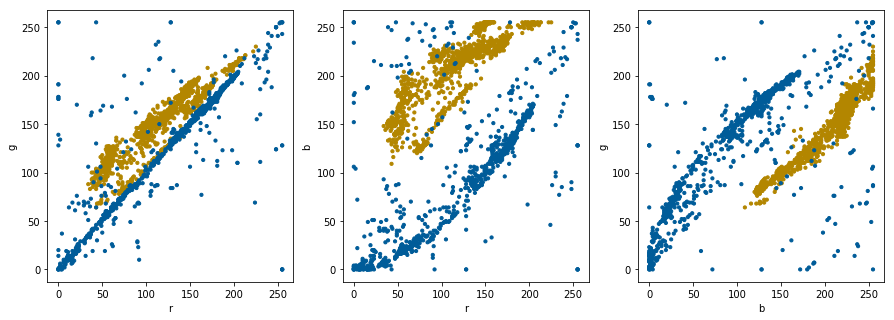

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

pairs_list = ['rg', 'rb', 'bg']
cmap_deep = ListedColormap(['#b38600', '#005c99']) # skin in bronw and no skin in blue
cmap_light = ListedColormap(['#ffdf80', '#80ccff'])

plt.figure(figsize=(15,5))
for i,pair in enumerate(pairs_list):
    plt.subplot(131+i)
    plt.scatter(x=pair[0], y=pair[1], c='y', cmap=cmap_deep, s=10, data=data, alpha=1)
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

plt.show()

Pixels are in a 3D space. Each dot represents a pixel and its color is :
- blue if "no-skin" 
- brown if "skin"

The above plots show the projections on the 3 pairs of axis :
- (r,g) red and green
- (r,b) red and blue
- (b,g) blue and green


**We can see that skin pixels seems to be easily separable of non-skin pixels**

The next function will be used to plot the decision boundaries of classifiers.

In [6]:
import numpy as np

def plot_classifier(method,title, plot_step = 2, margin = 10, logistic = False):
    """ 
    Plot the 3 classifiers trained on pair features : (r,g), (r,b) and (b,g). 
    The clasifier algorithm and parameters are defined by the *method* argument
    """
    
    plt.figure(figsize=(15,5))
    plt.suptitle(title, fontsize = 15)
    for i,pair in enumerate(pairs_list):
        # We only take the two corresponding features
        X = data[list(pair)].values
        y = data.y.values

        # Train
        classifier = method.fit(X, y)
    
        plt.subplot(1,3,i+1)
        x_min, x_max = 0 - margin, 255 + margin
        y_min, y_max = 0 - margin, 255 + margin
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        
        #plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=cmap_light)

        plt.scatter(pair[0],pair[1], c='y', cmap=cmap_deep, s=10, data=data)
        plt.xlabel(pair[0])
        plt.ylabel(pair[1])
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        
        if logistic:
            def f(x):
                intercept = classifier.intercept_[0]
                coef_1 = classifier.coef_[:,1]
                coef_0 = classifier.coef_[:,0]
                return (-intercept-coef_0*x)/coef_1
            plt.plot([x_min, x_max], 
                     [f(x_min), f(x_max)],
                     linewidth=3 , color = 'black')
        


## Spliting data into train/test sample

I split the data in to part : 
- train dataset wich will be used to train the classifier
- test dataset wich will be used to evaluate the performance of the classifier

The train is 70% of the data and test is 30%. Let's point out there is half skin/no-skin data in each.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['r','g','b']], 
                                                    data.y, 
                                                    test_size=0.3, 
                                                    random_state=10)

The next function will be used to evaluate the performance of a prediction : 

In [8]:
from pandas import DataFrame
from sklearn.metrics import accuracy_score, confusion_matrix

def performance(y_prediction, name = ''):
    print(' - '+name+' - \n '+'-'*(len(name)+4))
    print(" Accuracy : \n", accuracy_score(y_prediction, y_test), "\n")
    print(" Confusion Matrix :  \n", confusion_matrix(y_prediction, y_test), "\n")

I like having a look on the "stupid" classifier which always predict "1" or always "2": 

In [9]:
performance(np.full(y_test.shape, 2), name = 'Always 2')
performance(np.full(y_test.shape, 1), name = 'Always 1')

 - Always 2 - 
 ------------
 Accuracy : 
 0.496666666667 

 Confusion Matrix :  
 [[  0   0]
 [302 298]] 

 - Always 1 - 
 ------------
 Accuracy : 
 0.503333333333 

 Confusion Matrix :  
 [[302 298]
 [  0   0]] 



This is the baseline score to improve !

*NB : as I said, there is half skin/no-skin data in the test dataset. Hence the stupid classifiers score...*

----
**Now, I will use four emblematic machine learning algorithm. For each of them : **
- **I plot the decision boundaries of the resulting classifiers**
- **I print the performance **

# 1 - Logistic Regression

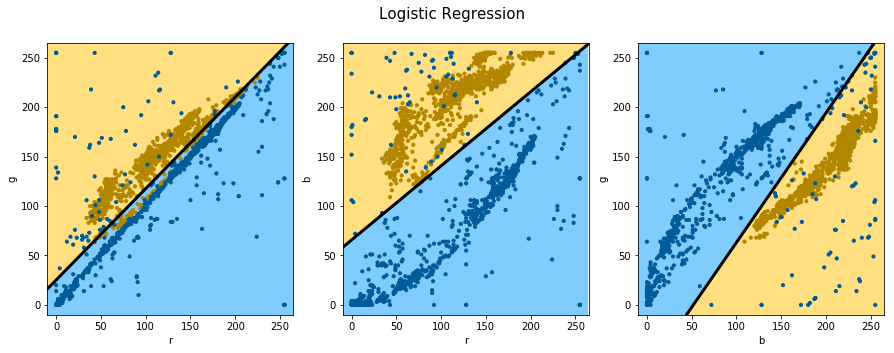

In [10]:
from sklearn.linear_model import LogisticRegression

plot_classifier(LogisticRegression(), title="Logistic Regression", logistic=True)

In [11]:
classifier = LogisticRegression()
y_predict = classifier.fit(X_train,y_train).predict(X_test)
performance(y_predict, name='Logistic Regression')

 - Logistic Regression - 
 -----------------------
 Accuracy : 
 0.965 

 Confusion Matrix :  
 [[298  17]
 [  4 281]] 



The result of the logistic regression are quite impressive : only 21 on 2000 pixels are in an incorrect class.

# 2 - Support Vector Machines

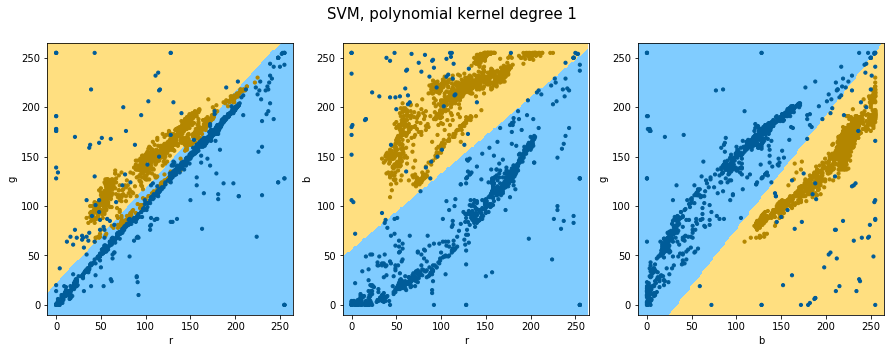

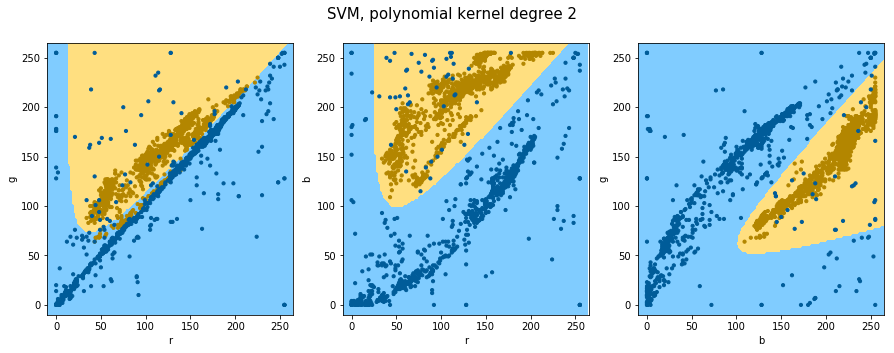

In [12]:
from sklearn.svm import SVC

plot_classifier(SVC(kernel = "poly",degree = 1, gamma=1/10000), title="SVM, polynomial kernel degree 1")
plot_classifier(SVC(kernel = "poly",degree = 2, gamma=1/10000), title="SVM, polynomial kernel degree 2")

In [13]:
classifier =SVC(kernel = "poly",degree = 2, gamma=1/10000)
y_predict = classifier.fit(X_train,y_train).predict(X_test)
performance(y_predict, name='SVC, polynomial kernel with degree 2')

 - SVC, polynomial kernel with degree 2 - 
 ----------------------------------------
 Accuracy : 
 0.988333333333 

 Confusion Matrix :  
 [[302   7]
 [  0 291]] 



SVM with a 2 degree polynomial kernel - a slightly more sofisticated model than Logisic regression - improve the score. The improvement is negligible as the Logistic regression already performed quite well !

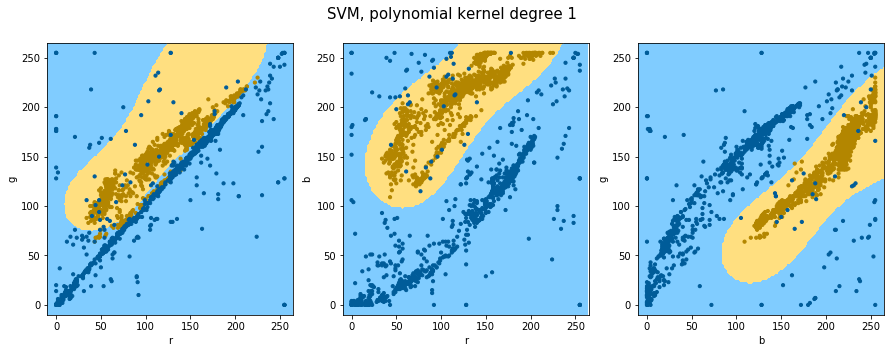

In [14]:
plot_classifier(SVC(kernel = "rbf", gamma=1/10000), title="SVM, polynomial kernel degree 1")

In [15]:
classifier = SVC(kernel = "rbf",degree = 1, gamma=1/10000)
y_predict = classifier.fit(X_train,y_train).predict(X_test)
performance(y_predict, name='SVC, rbf kernel')

 - SVC, rbf kernel - 
 -------------------
 Accuracy : 
 0.998333333333 

 Confusion Matrix :  
 [[302   1]
 [  0 297]] 



# 3 - Decision tree

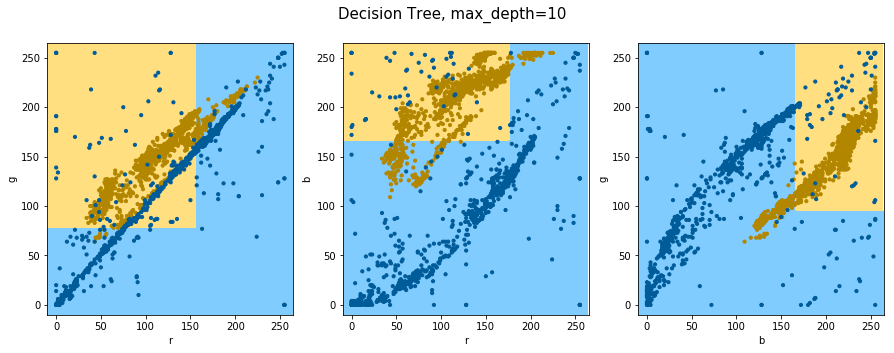

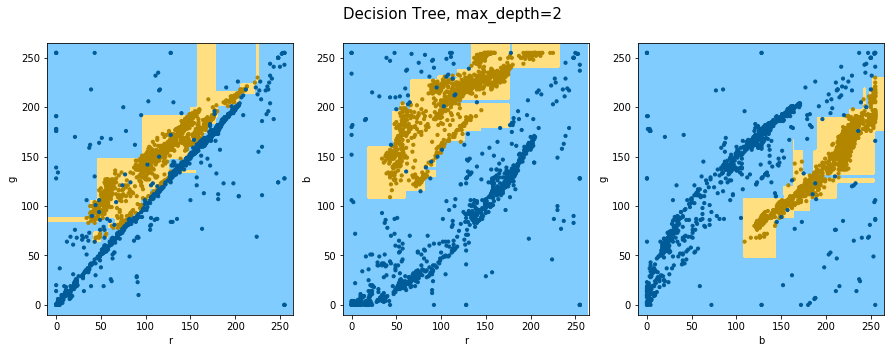

In [16]:
from sklearn.tree import DecisionTreeClassifier

plot_classifier(DecisionTreeClassifier(max_depth=2), title= "Decision Tree, max_depth=10")
plot_classifier(DecisionTreeClassifier(max_depth=10), title= "Decision Tree, max_depth=2")

In [17]:
classifier = DecisionTreeClassifier(max_depth=10)
y_predict = classifier.fit(X_train,y_train).predict(X_test)
performance(y_predict, name='Decision Tree')

 - Decision Tree - 
 -----------------
 Accuracy : 
 0.988333333333 

 Confusion Matrix :  
 [[298   3]
 [  4 295]] 



# 4 - Knn

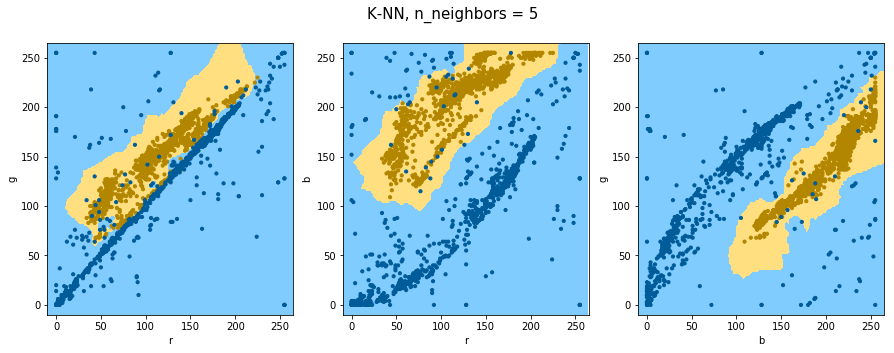

In [18]:
from sklearn.neighbors import KNeighborsClassifier

plot_classifier(KNeighborsClassifier(n_neighbors=5), title="K-NN, n_neighbors = 5")

In [19]:
classifier = KNeighborsClassifier(n_neighbors=5)
y_predict = classifier.fit(X_train,y_train).predict(X_test)
performance(y_predict, name='KNN with k=5 ')

 - KNN with k=5  - 
 -----------------
 Accuracy : 
 0.995 

 Confusion Matrix :  
 [[302   3]
 [  0 295]] 



# Conclusion

The task to sperate skin pixels from random pixels is quite easy. On a subsample of 2000 pixels, all the method predict correctly more than 95% of the data! The best model is *KNN* according to the accurcy score. Let's see how this model behave on the whole dataset. I apply the model, train on only 1400 pixels, to the whole dataset :

In [20]:
data = read_csv(data_url, delimiter='\t', names=['r', 'g', 'b', 'y'])
accuracy_score(classifier.predict(data[list('rgb')]), data.y)

0.98618280644911183

We get an very good score ! Then, classifier has not overfitted the data. It might have underfitted but, since the score is already very hight, we do not want to take the risk to overfit...